/var/folders/7r/dspvrpqs55v47y2w701fq4v80000gp/T/ipykernel_26719/1342529810.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_comparison_df, y="Model", x=metric, ax=axes[i], palette="viridis")
/var/folders/7r/dspvrpqs55v47y2w701fq4v80000gp/T/ipykernel_26719/1342529810.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_comparison_df, y="Model", x=metric, ax=axes[i], palette="viridis")
/var/folders/7r/dspvrpqs55v47y2w701fq4v80000gp/T/ipykernel_26719/1342529810.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(da

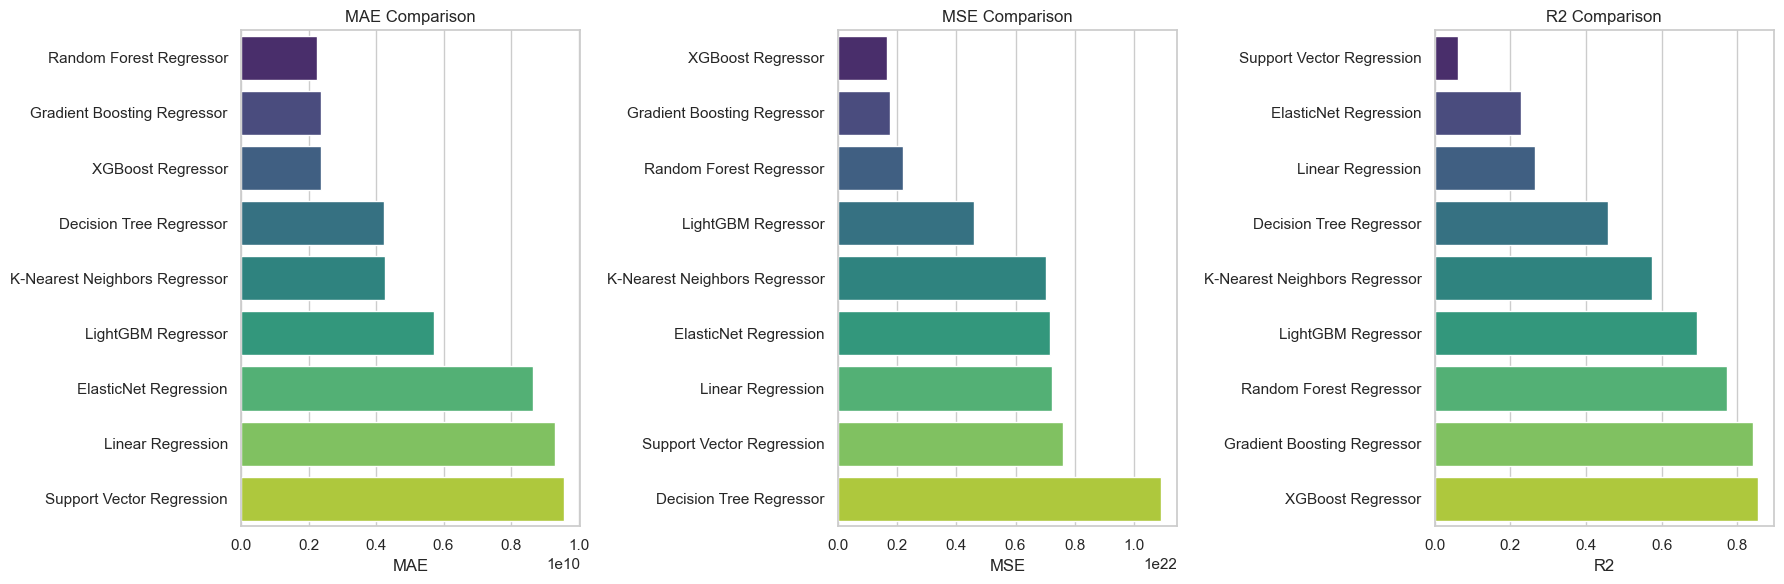

/var/folders/7r/dspvrpqs55v47y2w701fq4v80000gp/T/ipykernel_26719/1342529810.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_comparison_df, y="Model", x=metric, palette="viridis")


AttributeError: 'Figure' object has no attribute 'set_title'

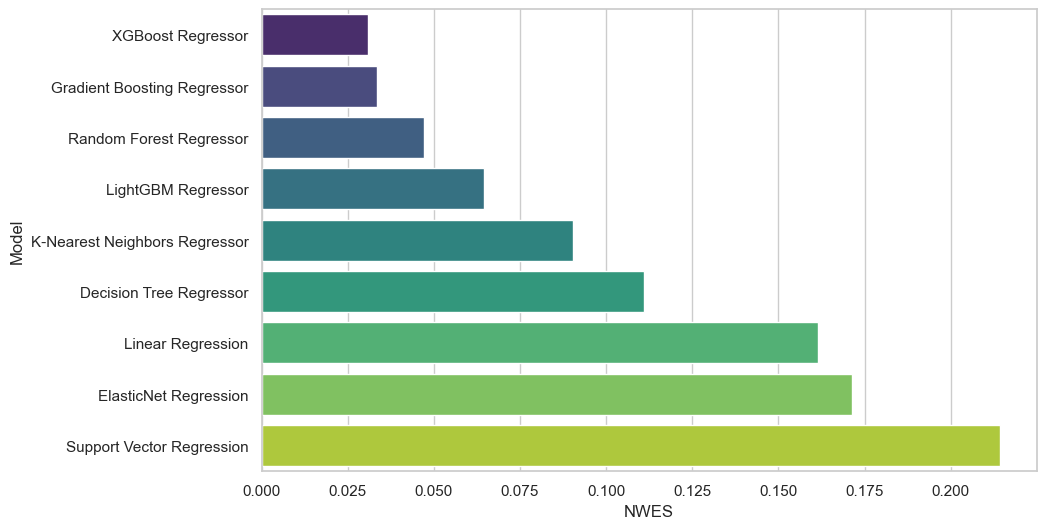

In [26]:
# ...existing code...

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Load the model comparison data
comparison_df = pd.read_csv("model_comparison (2).csv")

# Set the style for the plots
sns.set(style="whitegrid")

# Plot MAE, MSE, and R² as grouped bar plots
metrics = ['MAE', 'MSE', 'R2']

# Sort the data by each metric in ascending order
sorted_comparison_df = comparison_df.sort_values(by=metrics, ascending=True)

# Plot MAE, MSE, and R² as horizontal bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, metric in enumerate(metrics):
    sorted_comparison_df = comparison_df.sort_values(by=metric, ascending=True)
    sns.barplot(data=sorted_comparison_df, y="Model", x=metric, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

metric = "NWES"
sorted_comparison_df = comparison_df.sort_values(by=metric, ascending=True)
sns.barplot(data=sorted_comparison_df, y="Model", x=metric, palette="viridis")
fig.set_title(f"{metric} Comparison")
fig.set_xlabel(metric)
fig.set_ylabel("")

plt.tight_layout()
plt.show()

fig.savefig("model_comparison_metrics_horizontal.png", dpi=300)


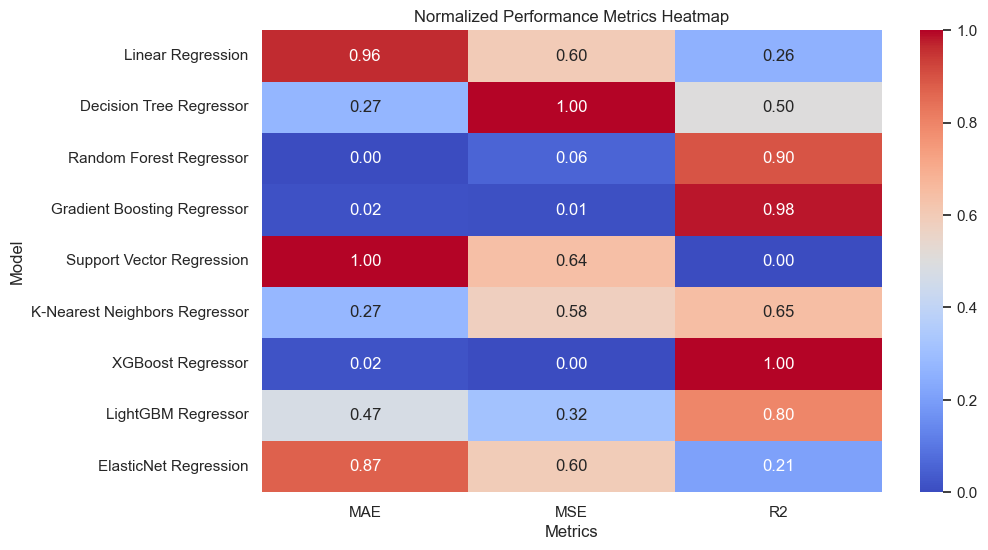

<Figure size 640x480 with 0 Axes>

In [3]:
# ...existing code...

# Normalize the metrics for better visualization
normalized_df = comparison_df.copy()
normalized_df[metrics] = normalized_df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df.set_index("Model")[metrics], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Normalized Performance Metrics Heatmap")
plt.ylabel("Model")
plt.xlabel("Metrics")
plt.show()

# Save the heatmap as a file
plt.savefig("normalized_metrics_heatmap.png", dpi=300, bbox_inches="tight")

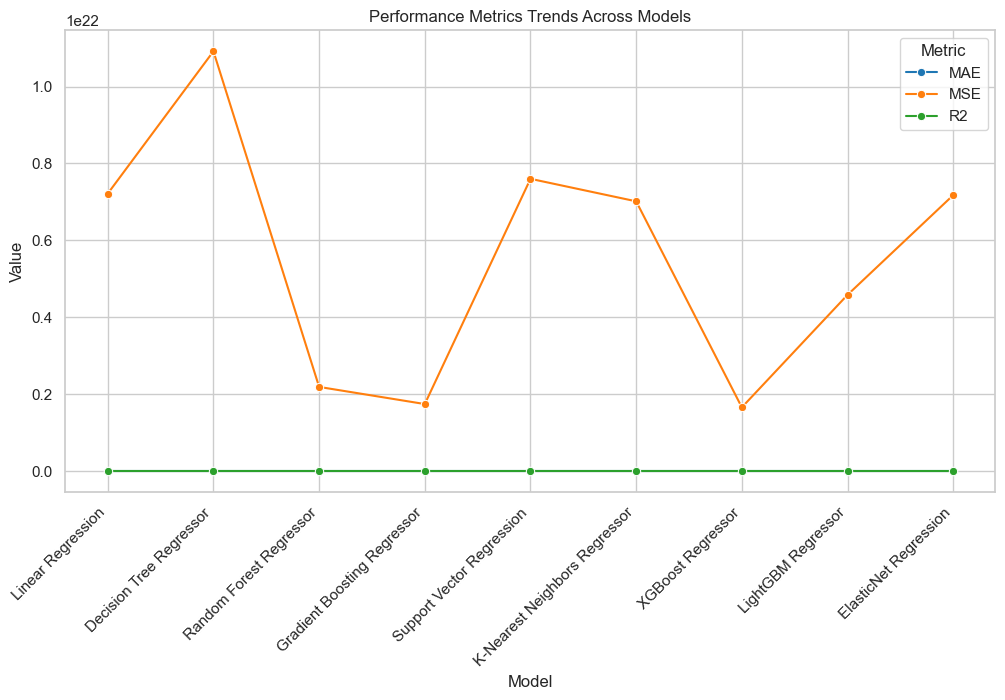

<Figure size 640x480 with 0 Axes>

In [7]:
# ...existing code...

# Melt the DataFrame for easier plotting
melted_df = comparison_df.melt(id_vars="Model", value_vars=metrics, var_name="Metric", value_name="Value")

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x="Model", y="Value", hue="Metric", marker="o", palette="tab10")
plt.title("Performance Metrics Trends Across Models")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Value")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()

# Save the plot as a file
plt.savefig("performance_metrics_trends.png", dpi=300, bbox_inches="tight")


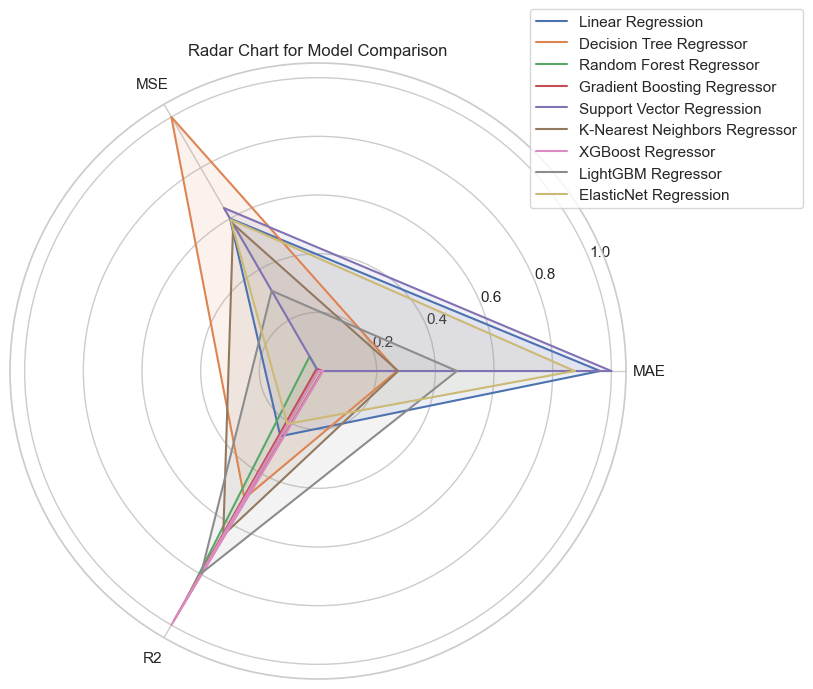

<Figure size 640x480 with 0 Axes>

In [ ]:
# ...existing code...

from math import pi

# Normalize the metrics for radar chart
radar_df = normalized_df.copy()
radar_df.set_index("Model", inplace=True)

# Create radar chart
categories = metrics
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, row in radar_df.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=i)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart for Model Comparison")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

# Save the radar chart as a file
plt.savefig("radar_chart_model_comparison.png", dpi=300, bbox_inches="tight")



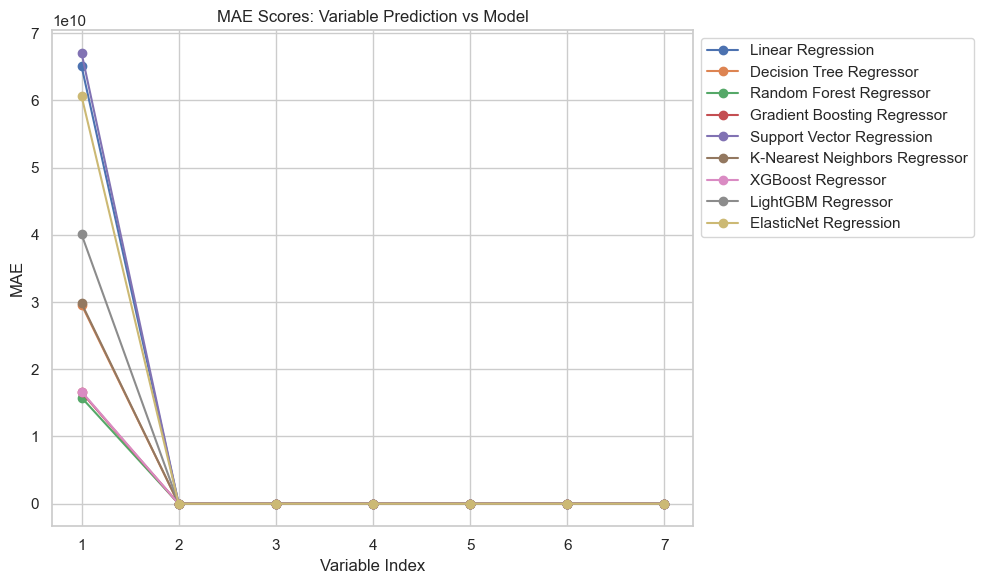

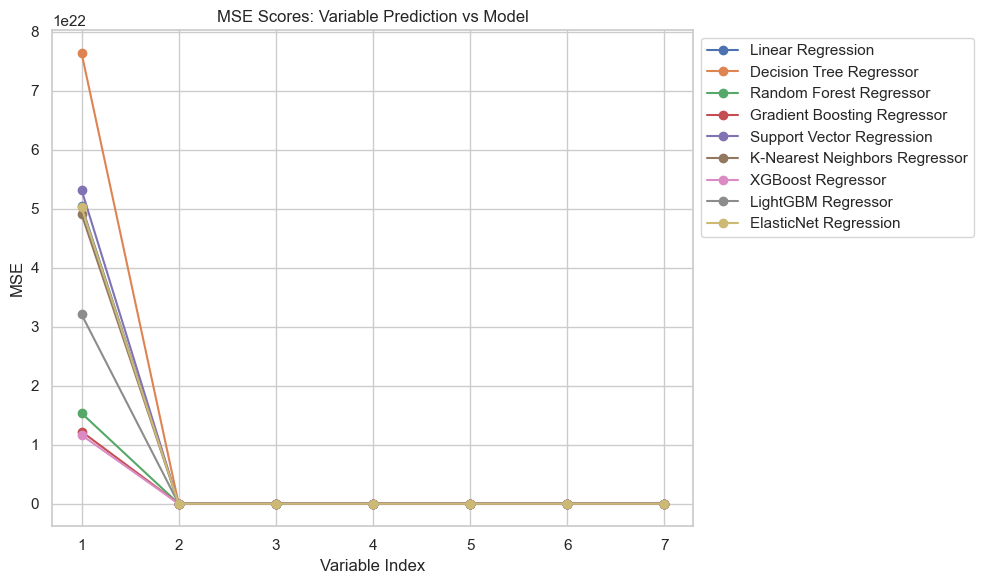

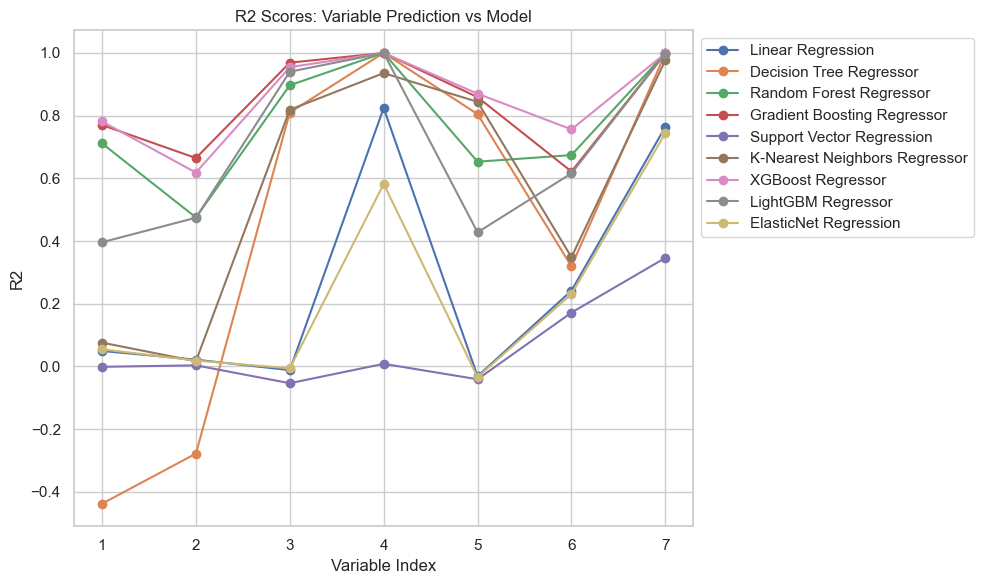

In [11]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/Users/vivek/DriveD/Thesis/MODEL/NEW/model_comparison (1).csv"
data = pd.read_csv(file_path)

# Convert stringified lists in MAE_Scores, MSE_Scores, and R2_Scores to actual lists
data['MAE_Scores'] = data['MAE_Scores'].apply(ast.literal_eval)
data['MSE_Scores'] = data['MSE_Scores'].apply(ast.literal_eval)
data['R2_Scores'] = data['R2_Scores'].apply(ast.literal_eval)

# Function to plot scores
# def plot_scores(score_column, title, ylabel):
#     plt.figure(figsize=(10, 6))
#     for index, row in data.iterrows():
#         plt.plot(range(1, len(row[score_column]) + 1), row[score_column], marker='o', label=row['Model'])
#     plt.title(title)
#     plt.xlabel('Variable Index')
#     plt.ylabel(ylabel)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

def plot_scores(score_column, title, ylabel):
    plt.figure(figsize=(10, 6))
    for index, row in data.iterrows():
        plt.plot(range(1, len(row[score_column]) + 1), row[score_column], marker='o', label=row['Model'])
    plt.title(title)
    plt.xlabel('Variable Index')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend to the side
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot MAE_Scores
plot_scores('MAE_Scores', 'MAE Scores: Variable Prediction vs Model', 'MAE')

# Plot MSE_Scores
plot_scores('MSE_Scores', 'MSE Scores: Variable Prediction vs Model', 'MSE')

# Plot R2_Scores
plot_scores('R2_Scores', 'R2 Scores: Variable Prediction vs Model', 'R2')

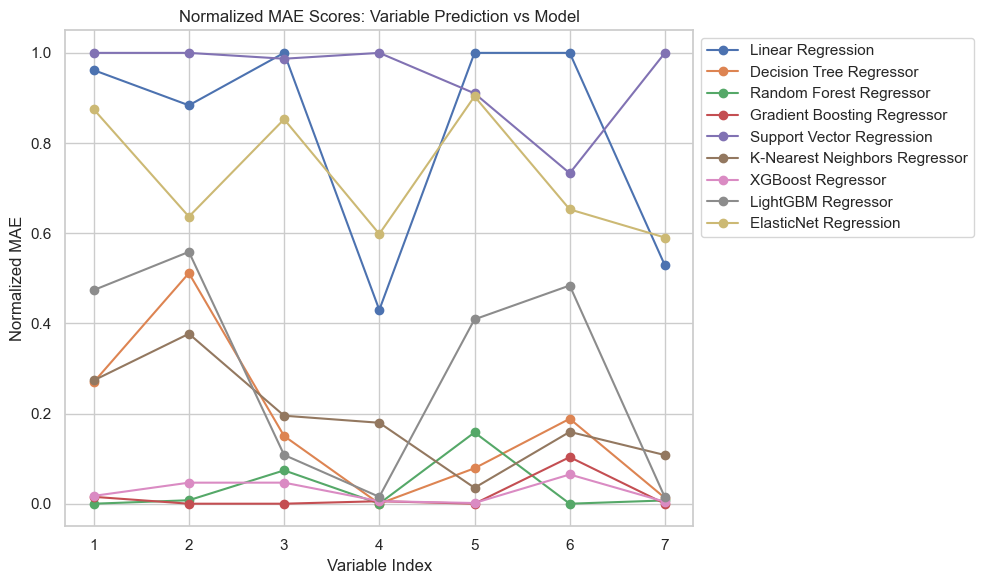

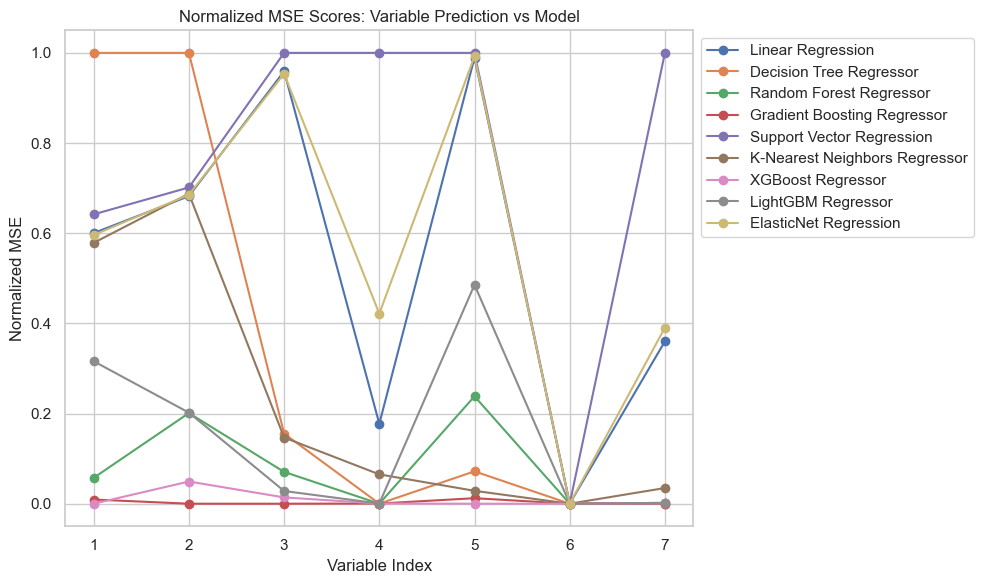

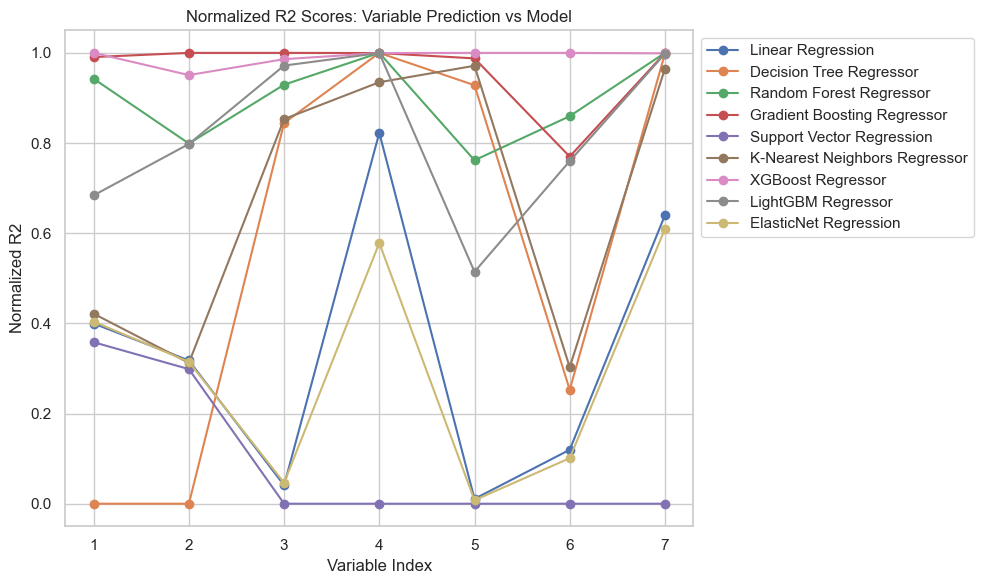

In [10]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = "/Users/vivek/DriveD/Thesis/MODEL/NEW/model_comparison (1).csv"
data = pd.read_csv(file_path)

# Convert stringified lists in MAE_Scores, MSE_Scores, and R2_Scores to actual lists
data['MAE_Scores'] = data['MAE_Scores'].apply(ast.literal_eval)
data['MSE_Scores'] = data['MSE_Scores'].apply(ast.literal_eval)
data['R2_Scores'] = data['R2_Scores'].apply(ast.literal_eval)

# Normalize the scores using MinMaxScaler
scaler = MinMaxScaler()

def normalize_scores(column):
    scores = pd.DataFrame(data[column].tolist())  # Convert list column to DataFrame
    normalized = scaler.fit_transform(scores)    # Normalize each variable
    return normalized.tolist()                   # Convert back to list format

data['Normalized_MAE_Scores'] = normalize_scores('MAE_Scores')
data['Normalized_MSE_Scores'] = normalize_scores('MSE_Scores')
data['Normalized_R2_Scores'] = normalize_scores('R2_Scores')
# Function to plot normalized scores with the legend moved to the side
def plot_scores(score_column, title, ylabel):
    plt.figure(figsize=(10, 6))
    for index, row in data.iterrows():
        plt.plot(range(1, len(row[score_column]) + 1), row[score_column], marker='o', label=row['Model'])
    plt.title(title)
    plt.xlabel('Variable Index')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend to the side
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot normalized MAE_Scores
plot_scores('Normalized_MAE_Scores', 'Normalized MAE Scores: Variable Prediction vs Model', 'Normalized MAE')

# Plot normalized MSE_Scores
plot_scores('Normalized_MSE_Scores', 'Normalized MSE Scores: Variable Prediction vs Model', 'Normalized MSE')

# Plot normalized R2_Scores
plot_scores('Normalized_R2_Scores', 'Normalized R2 Scores: Variable Prediction vs Model', 'Normalized R2')

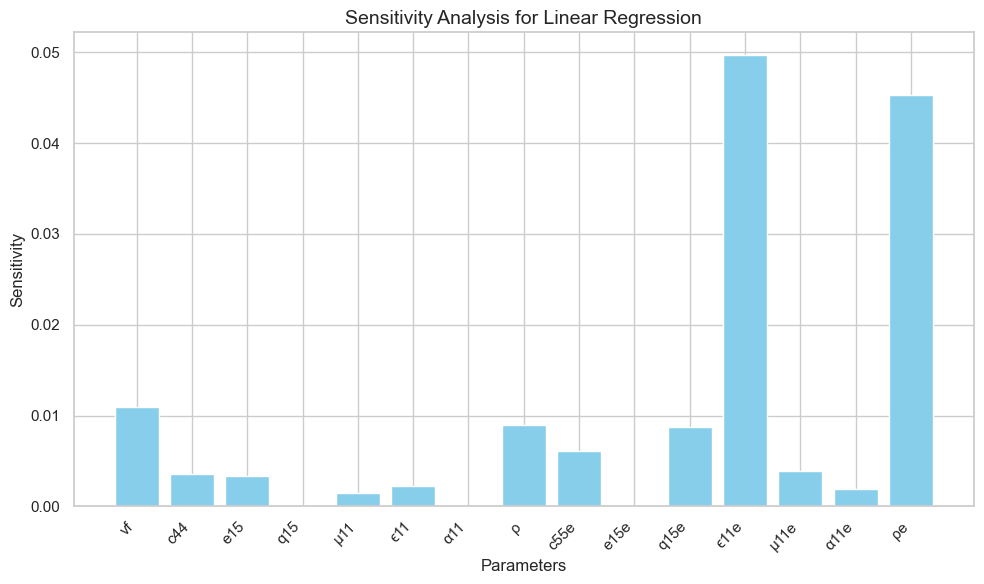

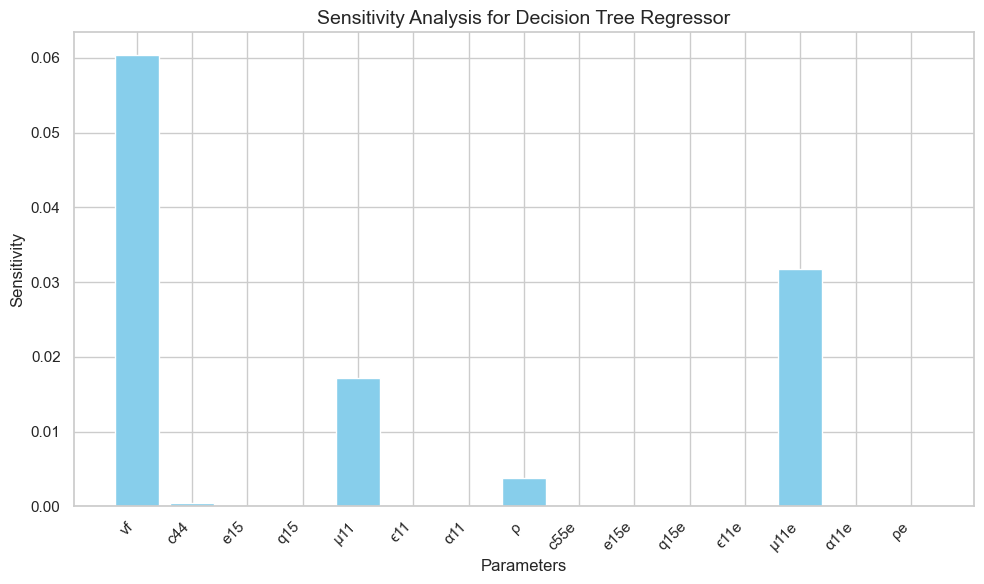

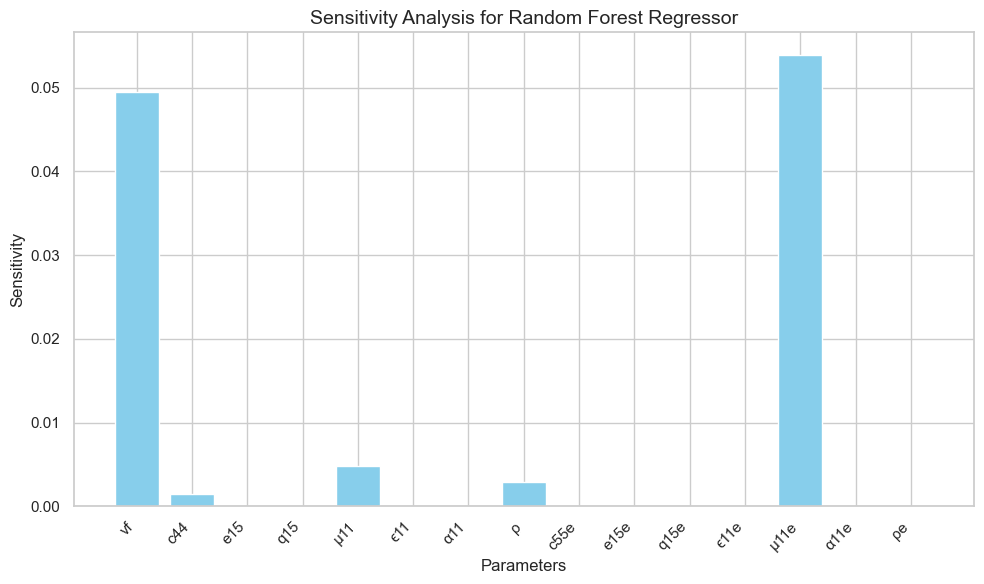

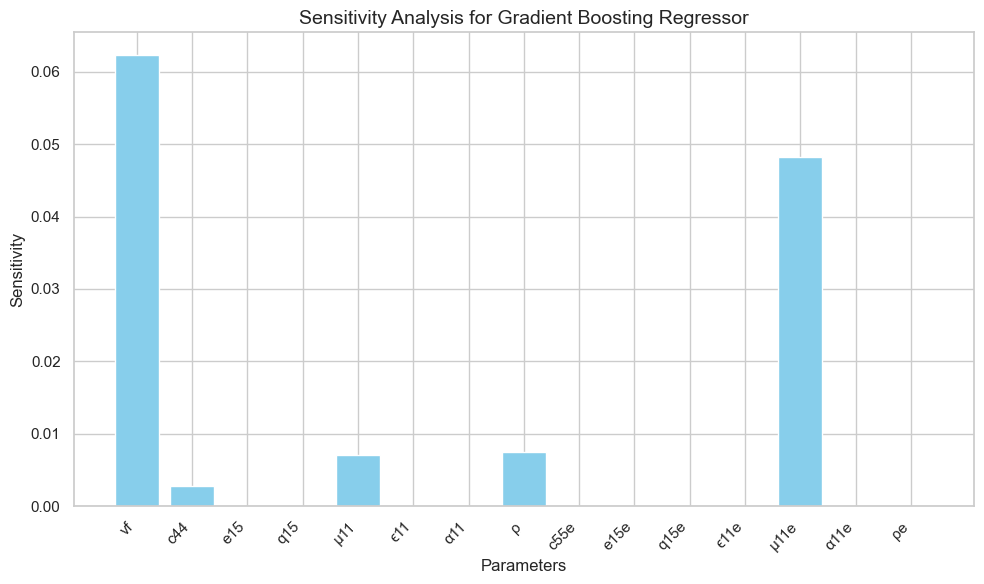

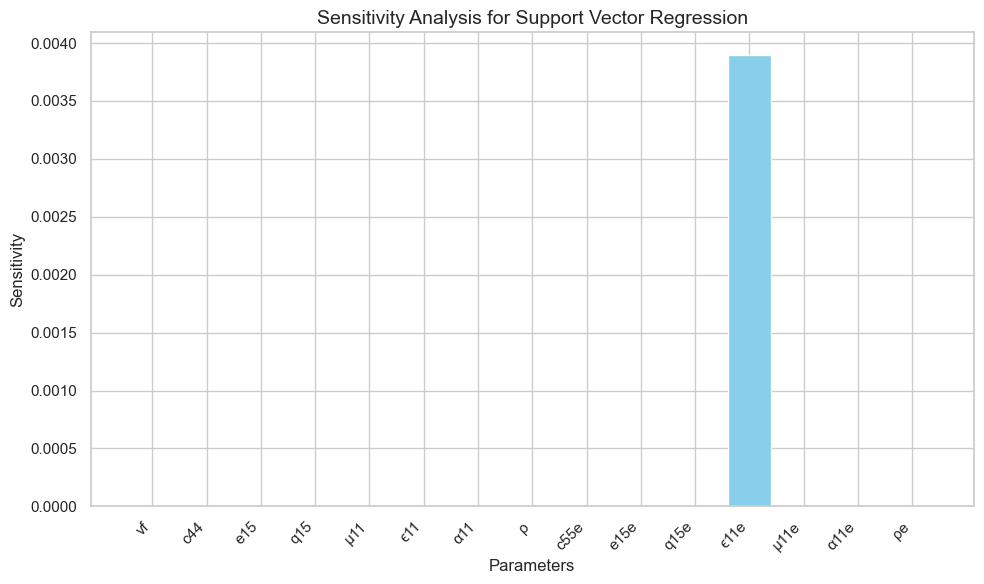

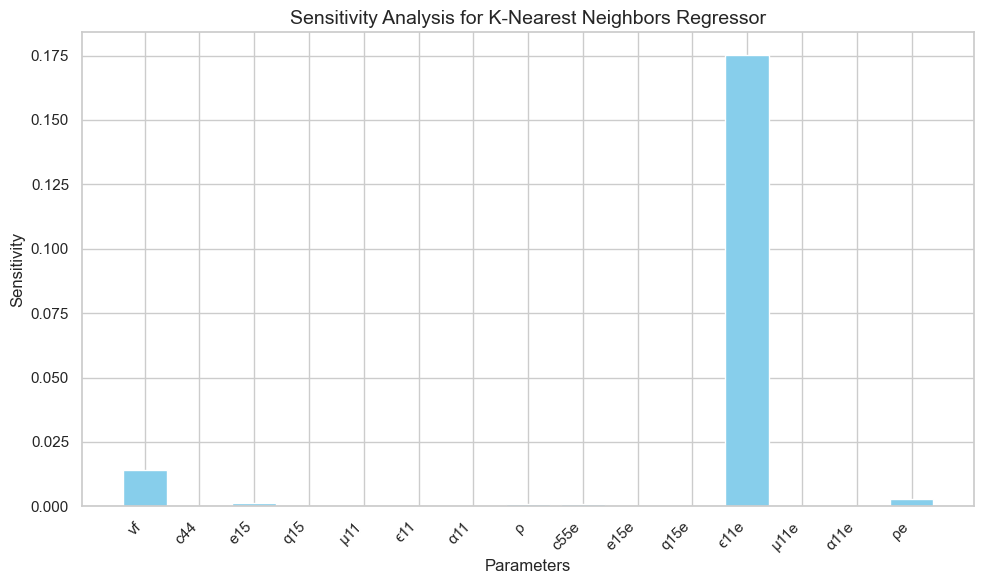

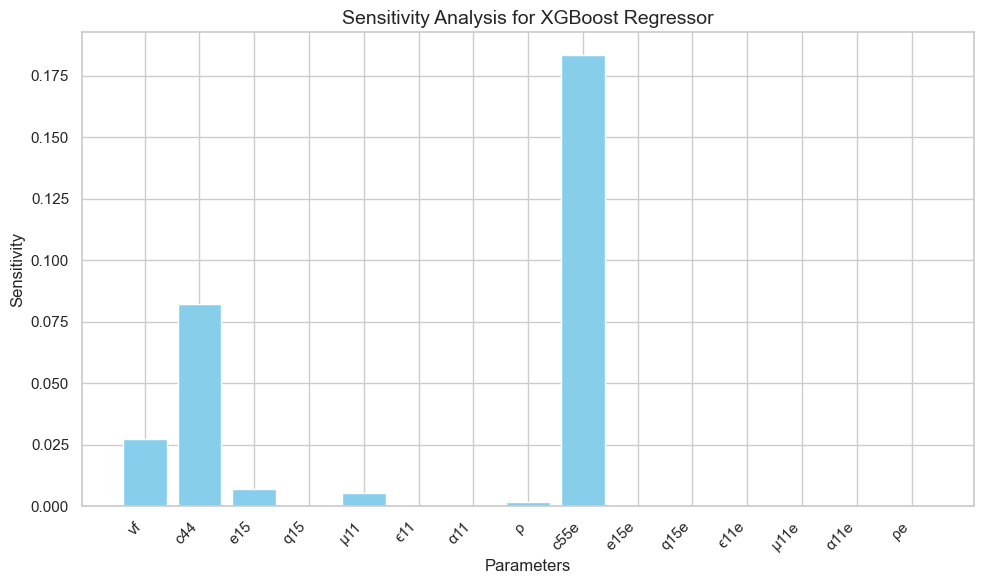

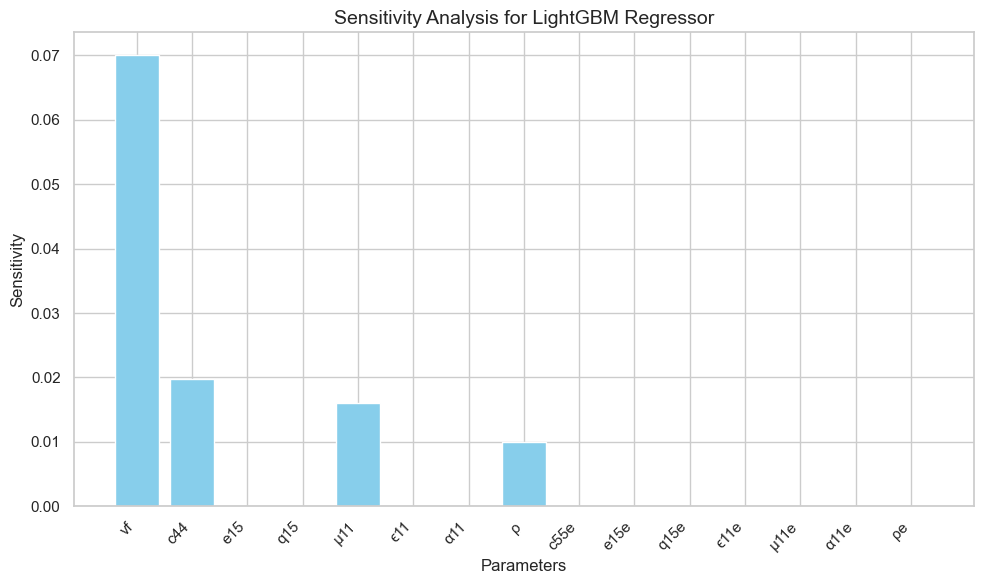

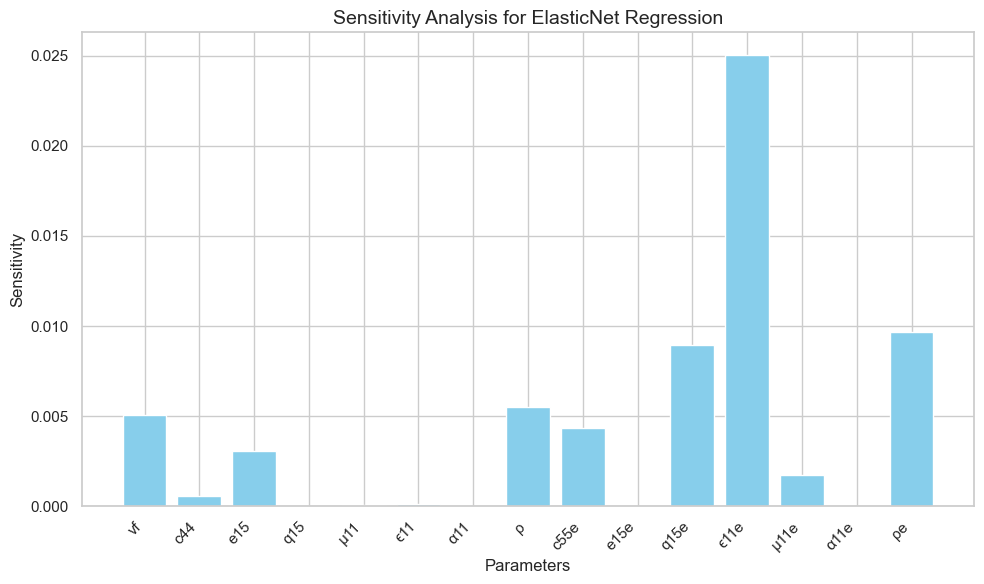

In [33]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/vivek/DriveD/Thesis/MODEL/NEW/advanced_model_analysis (1).csv'
data = pd.read_csv(file_path)

# Function to clean and convert the sensitivity strings to valid JSON
def clean_json_string(json_str):
    # Replace invalid parts of the string
    cleaned_str = json_str.replace("np.float64", "").replace("np.float32", "").replace("(", "").replace(")", "").replace("'", "\"")
    return json.loads(cleaned_str)

# Apply the cleaning function to the 'sensitivity' column
data['sensitivity'] = data['sensitivity'].apply(clean_json_string)

# Create a bar plot for each model
for index, row in data.iterrows():
    model = row['model']
    sensitivity = row['sensitivity']
    
    # Extract keys and values
    keys = list(sensitivity.keys())
    values = list(sensitivity.values())
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='skyblue')
    plt.title(f'Sensitivity Analysis for {model}', fontsize=14)
    plt.xlabel('Parameters', fontsize=12)
    plt.ylabel('Sensitivity', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

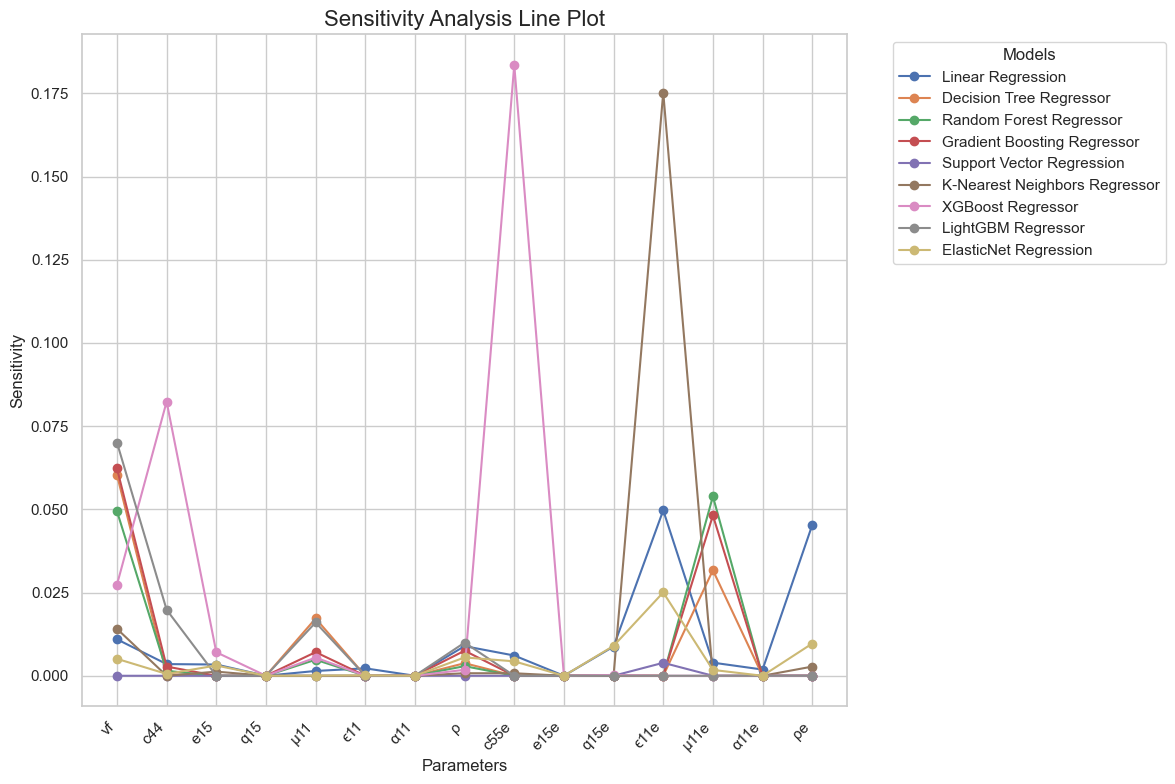

In [35]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/vivek/DriveD/Thesis/MODEL/NEW/advanced_model_analysis (1).csv'
data = pd.read_csv(file_path)

# Function to clean and convert the sensitivity strings to valid JSON
def clean_json_string(json_str):
    cleaned_str = json_str.replace("np.float64", "").replace("np.float32", "").replace("(", "").replace(")", "").replace("'", "\"")
    return json.loads(cleaned_str)

# Apply the cleaning function to the 'sensitivity' column
data['sensitivity'] = data['sensitivity'].apply(clean_json_string)

# Convert the sensitivity data into a DataFrame for plotting
sensitivity_df = pd.DataFrame(data['sensitivity'].tolist(), index=data['model'])

# Plot line plots for sensitivity values
plt.figure(figsize=(12, 8))
for model in sensitivity_df.index:
    plt.plot(sensitivity_df.columns, sensitivity_df.loc[model], marker='o', label=model)

plt.title("Sensitivity Analysis Line Plot", fontsize=16)
plt.xlabel("Parameters", fontsize=12)
plt.ylabel("Sensitivity", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()